# 03.01 Plot Reference

The full `matplotlib` engine is big and full of functionality.
Yet, we will attempt to cover the most commonly used plotting
techniques and several of their options.
The following is organized in a reference style.
This is because one is not supposed to remember this plethora
of commands and options.
Instead, one shall come back here or to the official
documentation when faced with a specific graphing problem.

Let's explore that `pyplot` interface with some examples of stylying graphs.
First the imports.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

One could use `plt.figure` and then `plt.axes` to get a hold of a single
figure with a single axes but using `plt.subplots` is often quicker.
By default (i.e. without positional arguments) `plt.subplots` will create
a single figure containing one axes.

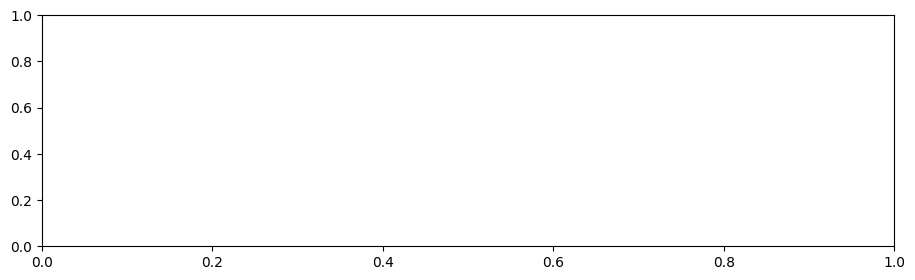

In [2]:
fig, ax = plt.subplots(figsize=(11, 3))

![Inches vs Meters](plt-inches.svg)

<div style="text-align:right;"><sup>plt-inches.svg</sup></div>

### Figure size

In the above we used the `figsize` argument.
It defines the size of the resulting figure **in inches**, based on the default DPI of 72.
Figure size is completely arbitrary,
and is likely that you want different sizes depending on the display size or accuracy of the figure.
One way to specify the figure size for all plots in a session is to alter `figure.figsize` as follows:

The `matplotlib` default is a `figure.figsize` of `(5, 3)` (width, height) inches.
This is often too small for presentations but good enough for a quick insight.

We are configuring the size of the entire figure, not of the plot within it.
A single figure can hold several plots (axes) at once.

## Numerical Computing - Again

We saw a handful of plots already but we did not talk about how they were made.
A plotted function is made numerically,
i.e. several points are plotted and straight lines are interleaved between them.
In other words, there is nothing particularly clever happening inside the plotting engine,
you only apply a function to each point and then plot the (x, y) vectors against each other.
For example, if we use a small number of points we can see the straight lines.

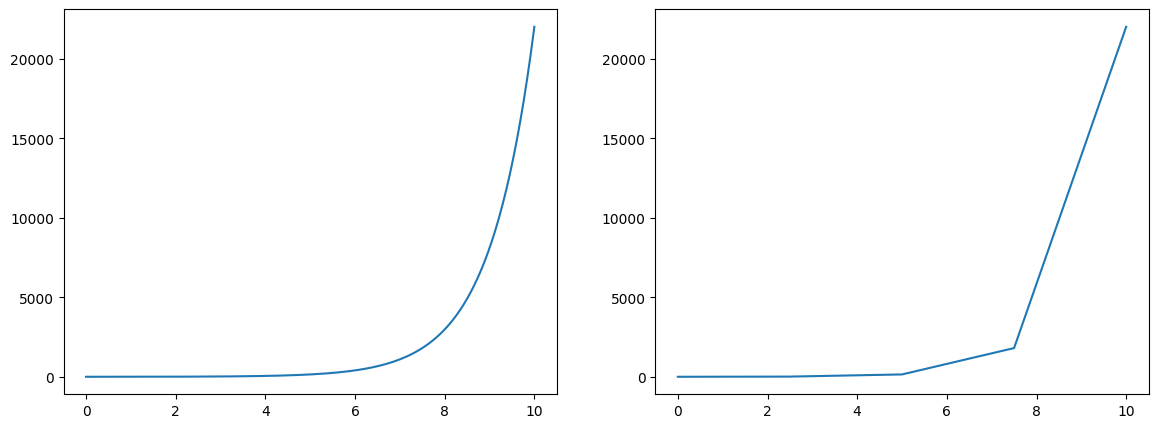

In [3]:
fig, axi = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(0, 10, 128)
axi.flat[0].plot(x, np.exp(x))
x = np.linspace(0, 10, 5)
axi.flat[1].plot(x, np.exp(x));

This can be seen better if we mark just the points in the graph,
without the lines between the points.
We do this by adding styling parameters,
here we will use a point to mean dot.

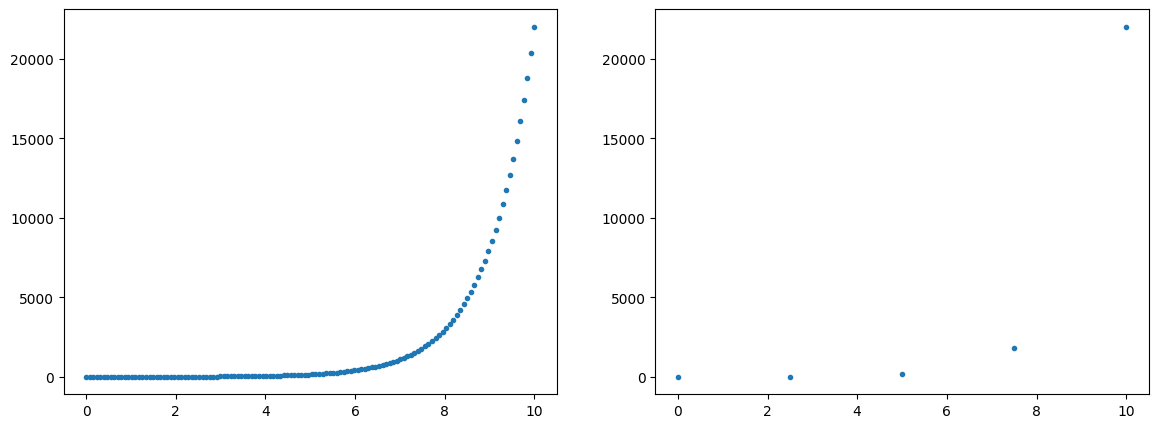

In [4]:
fig, axi = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(0, 10, 128)
axi.flat[0].plot(x, np.exp(x), ".")
x = np.linspace(0, 10, 5)
axi.flat[1].plot(x, np.exp(x), ".");

## Styling the Plot

As a visualization library specialized in plotting numerical functions,
`matplotlib` has lots of ways to customize a plot.
The simplest customizations are the most often used, these include:
styles of lines, axes limits and text on the plot.
There are many, many, many more customization options,
most of which are useful in particular problems and require a look into
the documentation even from people with great memory.
The secret is not to remember the information,
it is to have a good intuition about how to search for it.

### Colors, Lines and GNUPlot

The `color=` argument accepts:

- HTML color names
- HTML colors in `#RRGGBB` format
- An `(R, G, B)` tuple
- A single number between 0 and 1 meaning a grayscale
- And GNUPlot color names (including abbreviations)

The `linestyle=` argument accepts:

- Named styles: solid, dotted, dashed, dashdot
- Abbreviated styles: `-`, `:`. `--`, `-.` 

The `marker=` argument accepts several single character abbreviations of markers.

All these arguments can be combined as a single argument using the abbreviations.
By passing a 3rd argument to `plot` (or similar function) combining the
line style, color and marker (in that order) produces a specific plot style.
This is legacy from how the GNUPlot used style definitions,
yet it is still used in much of today's code.

Here are the reference tables for abbreviations:

| string | line style |
|:------ |:---------- |
| -      | solid      |
| --     | dashed     |
| -.     | dash-dot   |
| :      | dotted     |

| character | color   |
|:--------- |:------- |
| b         | blue    |
| g         | green   |
| r         | red     |
| c         | cyan    |
| m         | magenta |
| y         | yellow  |
| k         | black   |
| w         | white   |

| character | marker         |
|:--------- |:-------------- |
| .         | point          |
| ,         | pixel          |
| o         | circle         |
| v         | triangle down  |
| ^         | triangle up    |
| <         | triangle left  |
| >         | triangle right |
| s         | square         |
| p         | pentagon       |
| \*        | star           |
| h         | hexagon        |
| H         | fat hexagon    |
| \+        | plus           |
| x         | ex             |
| D         | diamond        |
| d         | thin diamond   |

[The docs][plot] show many more variants.
And one can change many, many more parameters of the graph.
We will see some of the `matplotlib` interfaces
but the complete picture is bigger:
there are interfaces from changing the plot title
all the way to change the angle of minor and major ticks
on the axes.

[plot]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html "matplotlib plot"

By calling `plot` several times on the same axes one can plot several functions,
let's build a handful of line style, color and marker examples on a single image.

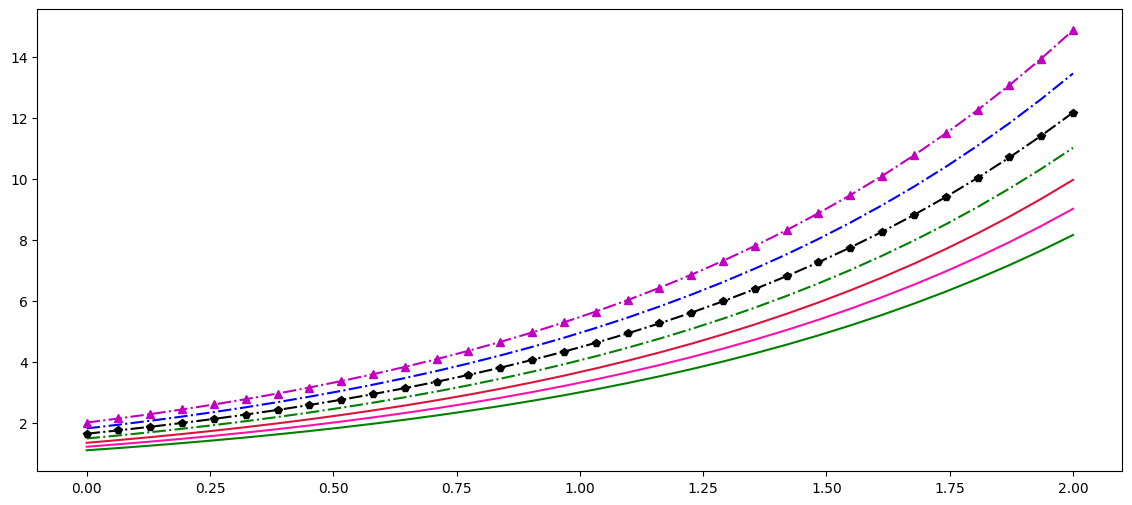

In [5]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 2, 32)

ax.plot(x, np.exp(x + 0.1), color="green")
ax.plot(x, np.exp(x + 0.2), color="#fe11aa")
ax.plot(x, np.exp(x + 0.3), color="crimson")
ax.plot(x, np.exp(x + 0.4), color="g", linestyle="dashdot")
ax.plot(x, np.exp(x + 0.5), color="k", linestyle="dashdot", marker="p")
ax.plot(x, np.exp(x + 0.6), "-.b")
ax.plot(x, np.exp(x + 0.7), "-.m^");

### Labels

A plot isn't complete without text.
Typical annotations on a plot are what is on each axis and a title.

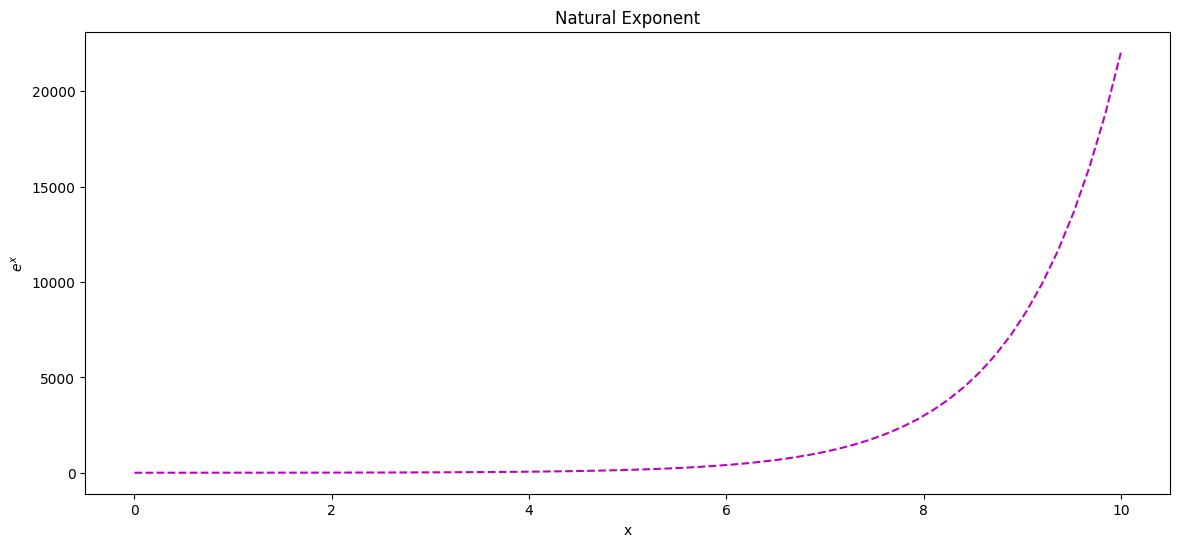

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 10, 64)

ax.plot(x, np.exp(x), "--m")
ax.set_title("Natural Exponent")
ax.set_xlabel("x")
ax.set_ylabel("$e^x$");

When several functions are plotted a legend is a way to describe the plot.
The legend aggregates all `label=` arguments of plotting functions.
The `loc=` argument is used to provide a hint for the best legend location.

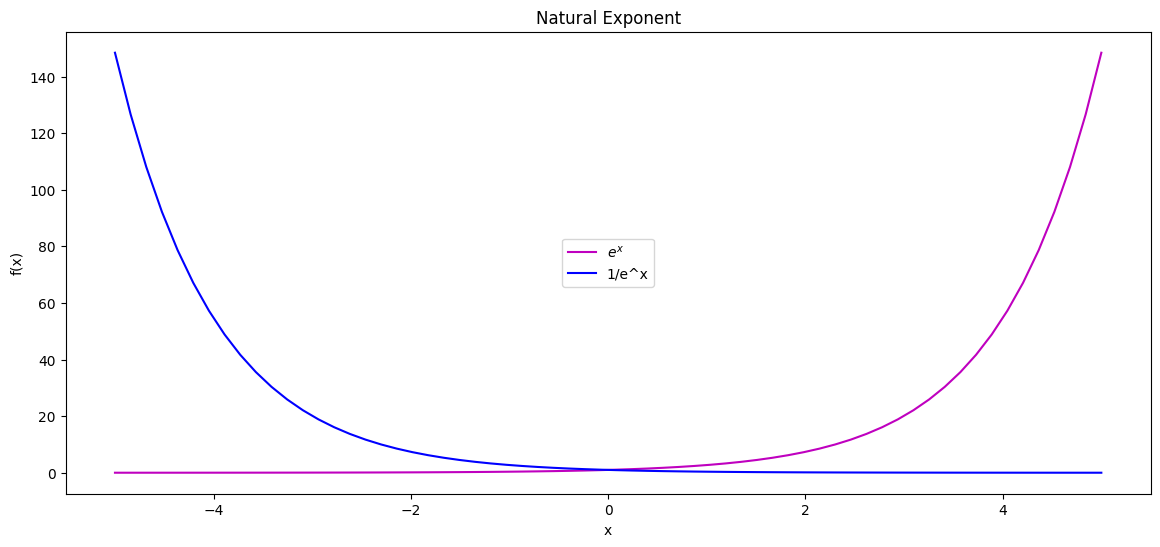

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(-5, 5, 64)

ax.plot(x, np.exp(x), "-m", label="$e^x$")
ax.plot(x, 1 / np.exp(x), "-b", label="1/e^x")
ax.set_title("Natural Exponent")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend(loc="center");

### Axis Limits

By default the limits of the axes are taken from the minimum and maximum values of the plotted function.
Yet, we can customize those.

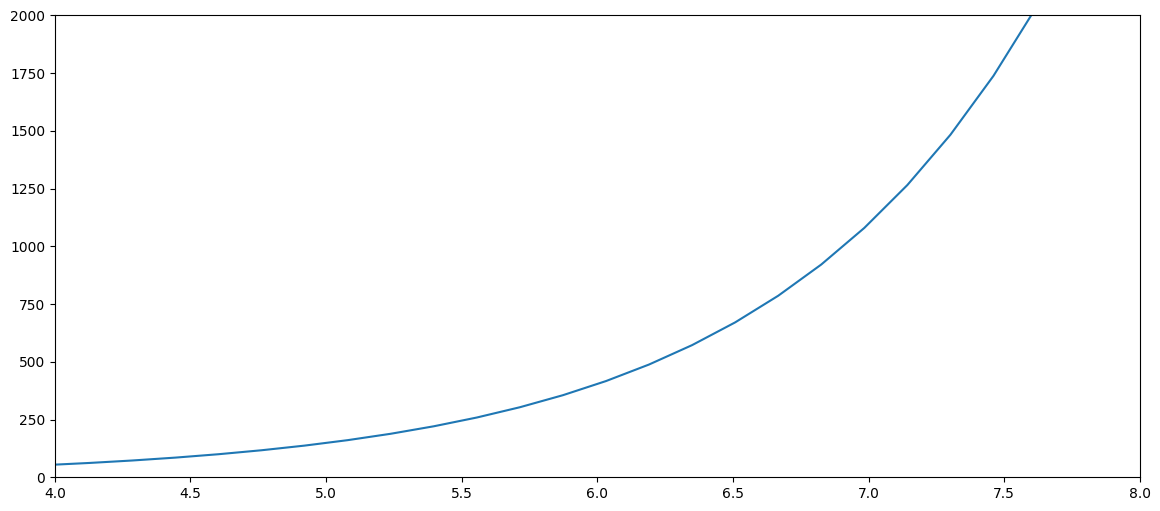

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 10, 64)

ax.plot(x, np.exp(x))
ax.axis([4, 8, 0, 2000]);

Other options are:

- `axis('tight')` - binds closer to the function limits (really visible within crowded plots)
- `axis('equal')` - same scale on both axes (x and y)
- `axis('off')` - remove ticks from the axes, the scale becomes impossible to measure

One can set the axes independently with `set_xlim` and `set_ylim`.
Moreover, one can combine labeling and tiding the axes with the `set` method of the axes,
which can perform several plot functions at once.  For example:

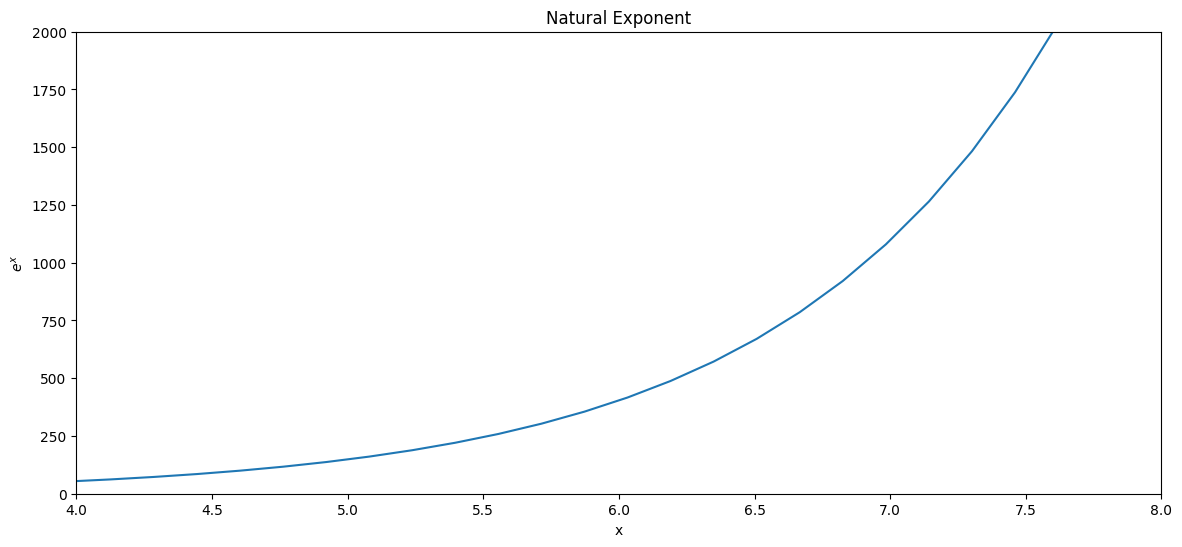

In [9]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.linspace(0, 10, 64)

ax.axis([4, 8, 0, 2000])
ax.plot(x, np.exp(x))
ax.set(
    xlim=(4, 8),
    ylim=(0, 2000),
    xlabel="x",
    ylabel="$e^x$",
    title="Natural Exponent",
);

### $\LaTeX$

You may have noticed stings written between dollar signs (`$`),
which, when plotted, produce some magic characters.
Text within dollar signs is interpreted as [$\LaTeX$][latex] (pronounced lah-tek)
and can contain a plethora of mathematical expressions.

[latex]: https://www.latex-project.org/ "LaTeX project"

$\LaTeX$ is a typesetting engine, originally for mathematical papers,
used as a standard for publications in several fields.
$\LaTeX$ is huge, and covering it is a course of its own;
moreover since `Jupyter` supports only partial $\LaTeX$ through the [MathJax][math]
JavaScript library, whilst `matplotlib` support is through its selected backend engine.
Yet, we will try a quick run through.

[math]: https://www.mathjax.org/ "MathJax"

The `{` and `}` characters perform grouping, the `\` character starts a function.
A function performs some form of display action based on the groupings passed to it.
(One can think of the groupings as function arguments.)
Here are some characters and display functions supported.

| symbol               | code                 |
|:-------------------- |:-------------------- |
| $\alpha$             | `\alpha`             |
| $\phi$               | `\phi`               |
| $\Phi$               | `\Phi`               |
| $\Pi$                | `\Pi`                |
| $\pi$                | `\pi`                |
| $\theta$             | `\theta`             |
| $\mu$                | `\mu`                |
| $\nabla$             | `\nabla`             |
| $\frac{\mu}{\theta}$ | `\frac{\mu}{\theta}` |
| $x^y$                | `x^y`                |
| $x_y$                | `x_y`                |
| $\sum$               | `\sum`               |
| $\prod$              | `\prod`              |
| $\in$                | `\in`                |
| $\notin$             | `\notin`             |
| $\partial$           | `\partial`           |
| $\ell$               | `\ell`               |
| $\neg$               | `\neg`               |
| $\forall$            | `\forall`            |
| $\vec{x}$            | `\vec{x}`            |

Symbol support is slightly different between `matplotlib` and `jupyter`
but we can use `jupyter` equations show how we can combine $\LaTeX$ elements.

$$
\frac{\sum^{N}_{i=0} x^i}{i}
$$

The above equation is generated by `\frac{\sum^{N}_{i=0} x^i}{i}`.

## A complex plot

Let's make a slightly more complicated plot step by step.
We will use the following data as FTSE100 index over a couple of days.
We have a number each hour and it starts at midnight.

Note that we only have a single set of data.
That is alright, we know that the data increases with the
same regularity.
If we provided just a single set of data to `plot`,
it will assume it to be the vertical axis values
and the horizontal axis is filled by the enumeration of the data.
This behavior is perfect for us since we have the data in
an enumeration of hours already.

(0.0, 9.0)

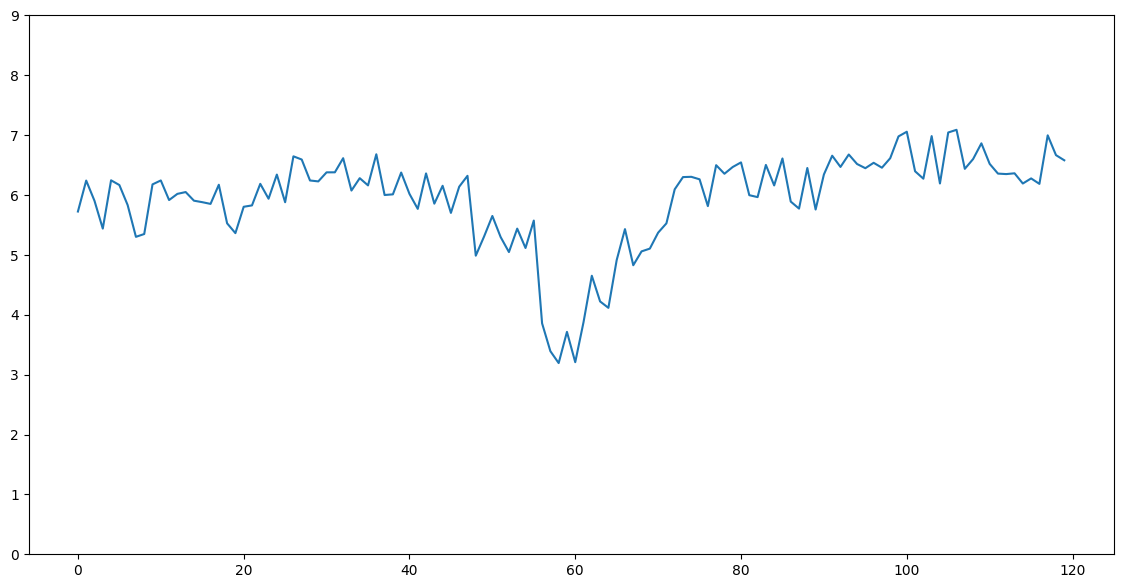

In [ ]:
# fmt: off
ftse100 = np.array([
    # October 1st
    5.7230, 6.2400, 5.9020, 5.4379, 6.2443, 6.1656,
    5.8311, 5.3005, 5.3476, 6.1762, 6.2420, 5.9147,
    6.0179, 6.0482, 5.9041, 5.8793, 5.8505, 6.1702,
    5.5260, 5.3622, 5.8024, 5.8254, 6.1855, 5.9369,
    # October 2nd
    6.3399, 5.8782, 6.6448, 6.5915, 6.2415, 6.2262,
    6.3773, 6.3778, 6.6136, 6.0734, 6.2800, 6.1595,
    6.6792, 5.9988, 6.0099, 6.3740, 6.0178, 5.7674,
    6.3594, 5.8545, 6.1530, 5.7003, 6.1374, 6.3195,
    # October 3rd
    4.9859, 5.3055, 5.6490, 5.2966, 5.0464, 5.4377,
    5.1142, 5.5724, 3.8561, 3.3914, 3.1928, 3.7136,
    3.2074, 3.8761, 4.6507, 4.2216, 4.1149, 4.9124,
    5.4293, 4.8262, 5.0575, 5.1038, 5.3699, 5.5259,
    # October 4th
    6.0938, 6.2982, 6.3028, 6.2610, 5.8135, 6.4969,
    6.3539, 6.4666, 6.5436, 5.9959, 5.9639, 6.5012,
    6.1587, 6.6091, 5.8891, 5.7719, 6.4501, 5.7566,
    6.3420, 6.6551, 6.4678, 6.6754, 6.5166, 6.4466,
    # October 5th
    6.5367, 6.4548, 6.6134, 6.9776, 7.0554, 6.3952,
    6.2713, 6.9828, 6.1918, 7.0430, 7.0875, 6.4359,
    6.5990, 6.8618, 6.5187, 6.3564, 6.3483, 6.3613,
    6.1908, 6.2760, 6.1849, 6.9953, 6.6646, 6.5787,
])
# fmt: on
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(ftse100)
ax.set_ylim(0.0, 9.0)

We can make up something from that plot alright:
it looks to be an index with its variability between hours,
somewhere in the middle we have a drop,
and later this drop recovers.
If we carefully count the hours we can make up on which day
the drop happened but that is quite a lot of work reading the graph.
We ought to make the reading of the graph easier.

For a start we should make the ticks as full days,
not an arbitrary number of hours.
We know that a day has $24$ hours (duh!) hence we can
add the ticks on every day.
With `set_ticks` we change the ticks themselves,
and with `set_ticklabels` we add the displayed label for each tick.
The size of the lists provided to both functions must be the same,
note that since we have $5$ days of data we will have $6$ ticks.

And to make the graph even easier to read we can add vertical lines
(`vlines`) at each tick.
There are plethora of styles for vertical (or horizontal - `hlines`)
which we can use.
We will stick to a simple dotted style for simplicity.

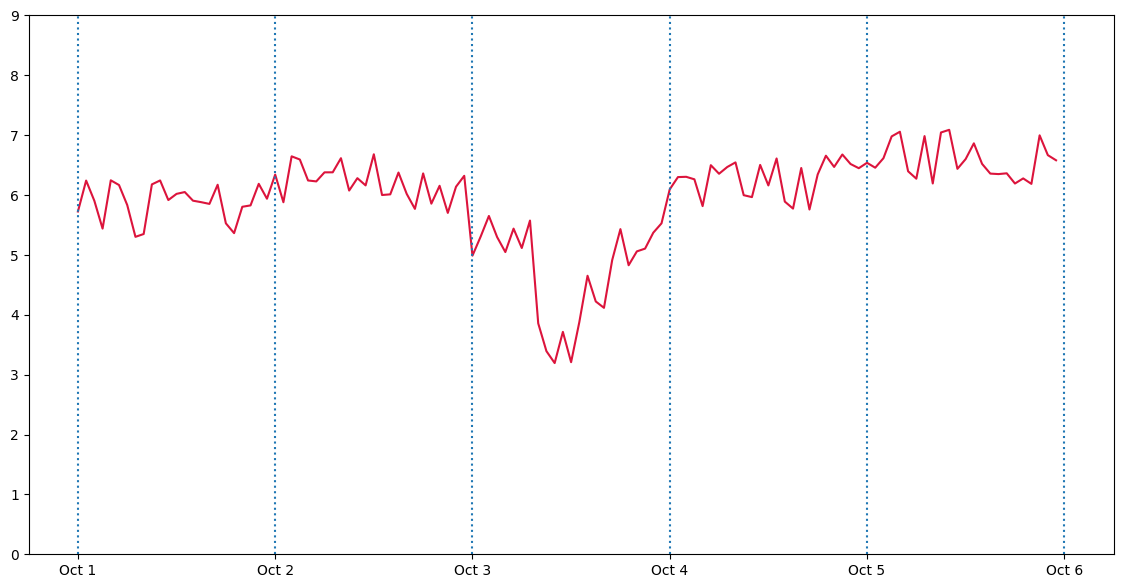

In [11]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(ftse100, color="crimson")
ax.set_ylim(0.0, 9.0)
ticks = [0, 24, 48, 72, 96, 120]
ax.set_xticks(ticks)
ax.set_xticklabels(["Oct 1", "Oct 2", "Oct 3", "Oct 4", "Oct 5", "Oct 6"])
ax.vlines(ticks, 0.0, 9.0, linestyles="dotted")

The graph looks considerably better,
a good deal of information is now easily available.
For example, we know straight away that the problematic day
was the 3rd of October.

Perhaps we can add more information that a reader may want to know.
The actual opening and closing values are good candidates,
one would like to see whether and how much the index went
up or down during the period.
Another thing we can add is an emphasis on what we wish to
present in the graph, in this case the fact that the 3rd
of October was a particularly bad day.
We will annotate the graph with this information.

To add text we can use the appropriately named `text` function.
It requires two coordinates and the text to be added at these
coordinates.
The thing to note is that the coordinates are in values
of what the graph is representing:
the first coordinate is the value in hours where the text should
be placed, and the second coordinate is the FTSE100 index value
where we will place the text.
We use the `text` function to note how badly the index was
performing on October the 3rd.

In order to give labels to the opening and closing values for
the index we could do the same as we do with the rash day
performance text.
One common labeling form for specific values on a graph
is to add an arrow to that specific point and then
write the label text at the other end of the arrow.
We could use the `text` function and the `arrow` function
(which simply receives four coordinates: two for the head
of the arrow and two for the tail of the arrow)
but we might end with trouble to align them together.
Instead `matplotlib` provides us with `annotate`,
which is a combination of `text` and `arrow`.
`annotate` receives two sets of coordinates:
first set to where the head of the arrow should point
and the second set to where the label text should
be located.
`annotate` accounts for margins on both the arrow
head and label text.

Text(110.0, 4.5787, 'Close 6.5787')

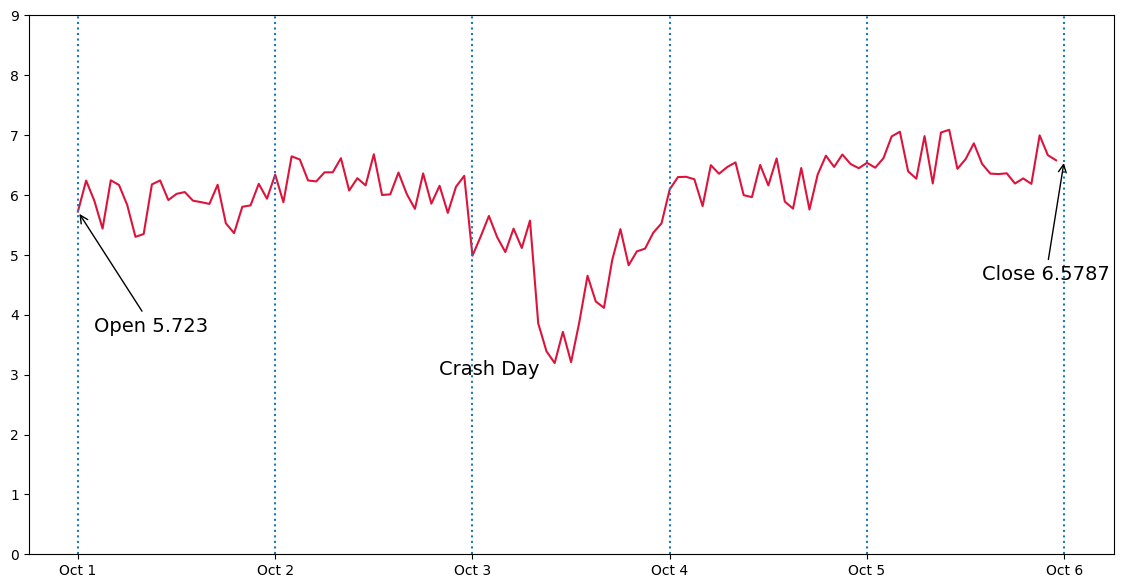

In [12]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(ftse100, color="crimson")
ax.set_ylim(0.0, 9.0)
ticks = [0, 24, 48, 72, 96, 120]
ax.set_xticks(ticks)
ax.set_xticklabels(["Oct 1", "Oct 2", "Oct 3", "Oct 4", "Oct 5", "Oct 6"])
ax.vlines(ticks, 0.0, 9.0, linestyles="dotted")
ax.text(50.0, 3.0, "Crash Day", fontsize=14, horizontalalignment="center")
ax.annotate(
    "Open %s" % ftse100[0],
    (0.0, ftse100[0]),
    (2.0, ftse100[0] - 2),
    fontsize=14,
    arrowprops={"arrowstyle": "->"},
)
ax.annotate(
    "Close %s" % ftse100[-1],
    (120.0, ftse100[-1]),
    (110.0, ftse100[-1] - 2),
    fontsize=14,
    arrowprops={"arrowstyle": "->"},
)

We placed the text at hour $50$ (since October 3rd is $48$
hours from the start of the data) and index value $3$.
The `fontsize=`, in points, allows us control in order
to make the text visible.
The text alignment should be self explanatory.
In the coordinates for `annotate` we use the first
and last data points directly.
This is the advantage of using the graph coordinates
to place labels: when labeling a specific point of the data
one can directly use the value from the data.

The graph looks very good right now.
The text could be worked a tad more,
when the labels cross the vertical lines it is difficult to read it.
We will use `matplotlib`'s path effects to add a pinkish glow
behind the text and make it readable.
When we add the text and annotations the return values
from the functions give us handles that allows us to edit
the elements further - this is a common pattern in `matplotlib`.
We take these handles and add a stroke effect in pink,
after that we add the normal path to place the actual text
on top of the pink stroke.

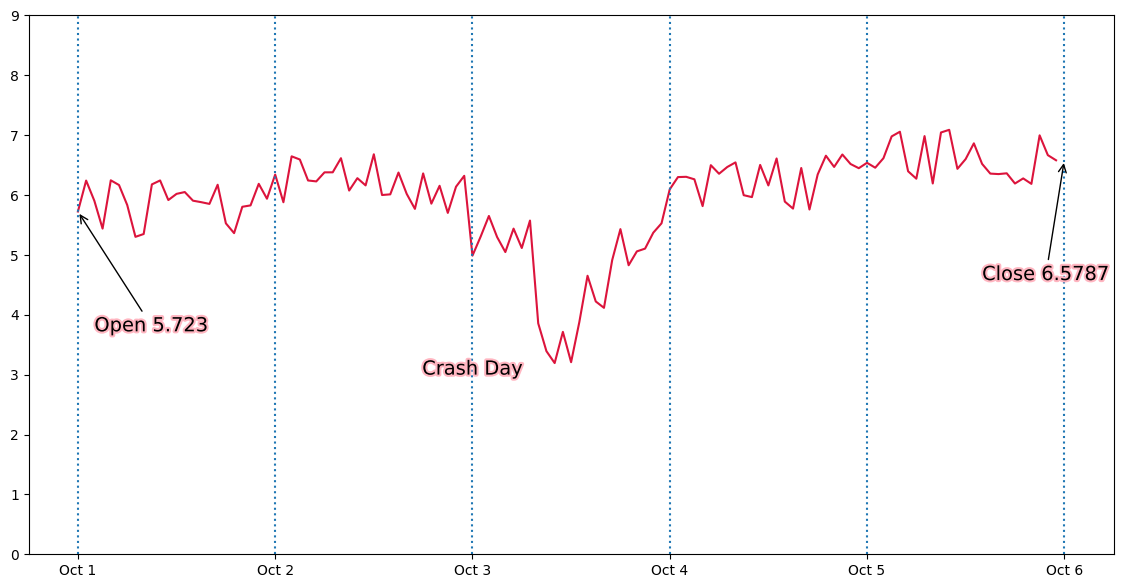

In [13]:
import matplotlib.patheffects as path_effects

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(ftse100, color="crimson")
ax.set_ylim(0.0, 9.0)
ticks = [0, 24, 48, 72, 96, 120]
ax.set_xticks(ticks)
ax.set_xticklabels(["Oct 1", "Oct 2", "Oct 3", "Oct 4", "Oct 5", "Oct 6"])
ax.vlines(ticks, 0.0, 9.0, linestyles="dotted")
t1 = ax.text(48.0, 3.0, "Crash Day", fontsize=14, horizontalalignment="center")
t2 = ax.annotate(
    "Open %s" % ftse100[0],
    (0.0, ftse100[0]),
    (2.0, ftse100[0] - 2),
    fontsize=14,
    arrowprops={"arrowstyle": "->"},
)
t3 = ax.annotate(
    "Close %s" % ftse100[-1],
    (120.0, ftse100[-1]),
    (110.0, ftse100[-1] - 2),
    fontsize=14,
    arrowprops={"arrowstyle": "->"},
)
for t in [t1, t2, t3]:
    t.set_path_effects(
        [
            path_effects.Stroke(linewidth=3, foreground="lightpink"),
            path_effects.Normal(),
        ]
    )

And we could keep going.
This graph now needs a title, labels for the axes.
Perhaps a legend explaining a bit about FTSE.
But we already saw those, and we will leave those extensions to you.

`matplotlib` is very extensive on interfaces to customize a graph,
one often finds more than one way to add more information a reader
may find useful.

## References

[matplotlib - Path Effects Guide][patheff]

[patheff]: https://matplotlib.org/tutorials/advanced/patheffects_guide.html "Path Effects"